In [402]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
file = 'log-6-10-0.05-z0.14.dat'
data = pd.read_csv(open(file,'r'),comment='#',sep='\s+',usecols=range(2,4),
                   names=['logAge', 'Mini'])
data_lt150 = data[data['Mini'] < 150]
mmax = data_lt150.groupby('logAge').aggregate('max').reset_index()
# print(mmax)
mini = [i for i in data_lt150[data_lt150['logAge'] == 6.0]['Mini']]
# mini

In [403]:
data.to_csv('/home/sarah/data.txt', sep=' ', header=False, index=False)
mmax = data_lt150.groupby('logAge').aggregate('max').reset_index()
mmax.logAge

0      6.00000
1      6.05000
2      6.10000
3      6.15000
4      6.20000
        ...   
78     9.90001
79     9.95002
80    10.00002
81    10.05002
82    10.10002
Name: logAge, Length: 83, dtype: float64

In [373]:
mmax.reset_index().to_csv('/home/sarah/padinp.txt', sep=' ', header=False, index=False)

In [374]:
file2 = 'IGIMFS'
data2 = pd.read_csv(open(file2,'r'),sep='\s+',names=['mf','IGIMF1','IGIMF2','IGIMF3'])


In [375]:
# data2.head()

In [376]:
# data2['mf']

In [377]:
# mmax

In [378]:
IGIMF1 = {row['mf'] : row['IGIMF1'] for index, row in data2.iterrows()}
IGIMF2 = {row['mf'] : row['IGIMF2'] for index, row in data2.iterrows()}
IGIMF3 = {row['mf'] : row['IGIMF3'] for index, row in data2.iterrows()}

In [379]:
# mmax

In [380]:
PDMF_DICT = {}
REMM_DICT = {}
# for k in range(len(mmax)):

for i,row in mmax.iterrows():
    mini = row['Mini']
    logage = row['logAge']
#     print(logage)
    PDMF = {}
    for j in data2['mf']:
        if mini > j:
            PDMF[j] = IGIMF1[j]
        else:
            PDMF[j] = 0.0
            if mini not in REMM_DICT:
                REMM_DICT[mini] = 0.0
            if j >= 40.0:
                REMM_DICT[mini] += 0.5*j
            elif j >= 8.5 and j < 40.0:
                REMM_DICT[mini] += 1.4
            elif j < 8.5:
                REMM_DICT[mini] += (0.077*j)+0.48
    PDMF_DICT[logage] = PDMF 
              
            

In [412]:
values5 = [value for key,value in sorted(list(REMM_DICT.items()))]
age1=mmax.logAge 
plt.plot(age1, values5)
# data_lt150.logAge
np.size(values5)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [381]:
PDMF_DICT2 = {}
REMM_DICT2 = {}
# for k in range(len(mmax)):

for i,row in mmax.iterrows():
    mini = row['Mini']
    logage = row['logAge']
#     print(logage)
    PDMF2 = {}
    for j in data2['mf']:
        if mini > j:
            PDMF2[j] = IGIMF2[j]
        else:
            PDMF2[j] = 0.0
            if mini not in REMM_DICT2:
                REMM_DICT2[mini] = 0.0
            if j >= 40.0:
                REMM_DICT2[mini] += 0.5*j
            elif j >= 8.5 and j < 40.0:
                REMM_DICT2[mini] += 1.4
            elif j < 8.5:
                REMM_DICT2[mini] += (0.077*j)+0.48
    PDMF_DICT2[logage] = PDMF2           
            

In [382]:
PDMF_DICT3 = {}
REMM_DICT3 = {}
# for k in range(len(mmax)):

for i,row in mmax.iterrows():
    mini = row['Mini']
    logage = row['logAge']
#     print(logage)
    PDMF3 = {}
    for j in data2['mf']:
        if mini > j:
            PDMF3[j] = IGIMF3[j]
        else:
            PDMF3[j] = 0.0
            if mini not in REMM_DICT3:
                REMM_DICT3[mini] = 0.0
            if j >= 40.0:
                REMM_DICT3[mini] += 0.5*j
            elif j >= 8.5 and j < 40.0:
                REMM_DICT3[mini] += 1.4
            elif j < 8.5:
                REMM_DICT3[mini] += (0.077*j)+0.48
    PDMF_DICT3[logage] = PDMF3           
            

In [396]:
# PDMF_DICT
# REMM_DICT3

In [384]:
# list(PDMF_DICT.keys())

In [385]:
# for logage in PDMF_DICT.keys():
#     plt.figure()
#     keys = sorted((list(PDMF_DICT[logage].keys())))

#     values = [value for key,value in sorted(list(PDMF_DICT[logage].items()))]
#     values = [np.log10(i) for i in values if i != 0]
#     plt.plot(keys[:len(values)] , values)

In [386]:
PDMF_SUM = {key: sum([pdmf[key] for pdmf in PDMF_DICT.values()]) for key in PDMF_DICT[6.0].keys()}
PDMF_SUM2 = {key: sum([pdmf[key] for pdmf in PDMF_DICT2.values()]) for key in PDMF_DICT2[6.0].keys()}
PDMF_SUM3 = {key: sum([pdmf[key] for pdmf in PDMF_DICT3.values()]) for key in PDMF_DICT3[6.0].keys()}

In [387]:
#  PDMF_SUM

In [388]:
keys = np.log10(sorted((list(PDMF_SUM.keys()))))
values = [value for key,value in sorted(list(PDMF_SUM.items()))]
values = [np.log10(i) for i in values if i != 0]
keys2 = np.log10(sorted((list(PDMF_SUM2.keys()))))
values2 = [value for key,value in sorted(list(PDMF_SUM2.items()))]
values2 = [np.log10(i) for i in values2 if i != 0]
keys3 = np.log10(sorted((list(PDMF_SUM3.keys()))))
values3 = [value for key,value in sorted(list(PDMF_SUM3.items()))]
values3 = [np.log10(i) for i in values3 if i != 0]
# plt.plot(keys[:len(values)] , values)


In [389]:
# PDMF_SUM3

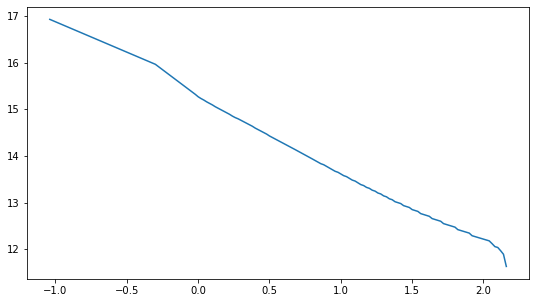

In [390]:

fig, ax = plt.subplots(figsize=(9, 5))
plt.plot(keys2[:len(values2)] , values2)

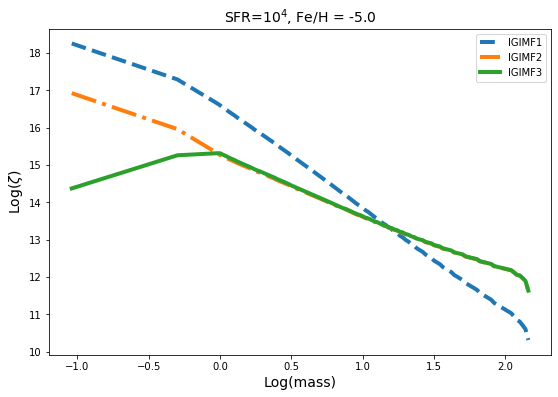

In [391]:

fig= plt.figure(figsize=(9.0,6.0))
# line1, =ax.plot(keys3[:len(values3)] , values3, '-', linewidth=4,   size=(9.0,4.5)) 
#, size=(9.0,4.5))
plt.plot(keys[:len(values)] , values, '--', linewidth='4',label='IGIMF1')#, size=(9.0,4.5))
plt.plot(keys2[:len(values2)] , values2, '-.', linewidth='4',label='IGIMF2')
plt.plot(keys3[:len(values3)] , values3, linewidth='4', label='IGIMF3')
plt.ylabel('Log($\zeta$)', fontsize='14')
plt.xlabel('Log(mass)', fontsize='14')
plt.title('SFR=$10^4$, Fe/H = -5.0', fontsize='14')
plt.legend(loc='upper right')
plt.show()
fig.savefig('15.png')